In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df_15 = pd.read_csv('../data/survey_scores_clean_15.csv')
df_16 = pd.read_csv('../data/survey_scores_clean_16.csv')
df_17 = pd.read_csv('../data/survey_scores_clean_17.csv')
df_18 = pd.read_csv('../data/survey_scores_clean_18.csv')
df_19 = pd.read_csv('../data/survey_scores_clean_19.csv')

In [4]:
sub_15 = df_15.loc[:, ['student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']]
sub_16 = df_16.loc[:, ['student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']]
sub_17 = df_17.loc[:, ['student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']]
sub_18 = df_18.loc[:, ['student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']]
sub_19 = df_19.loc[:, ['student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']]

Because there are too many columns, I am viewing only the relationship of the response rates with my target of the combined (ELA & Math) mean score.

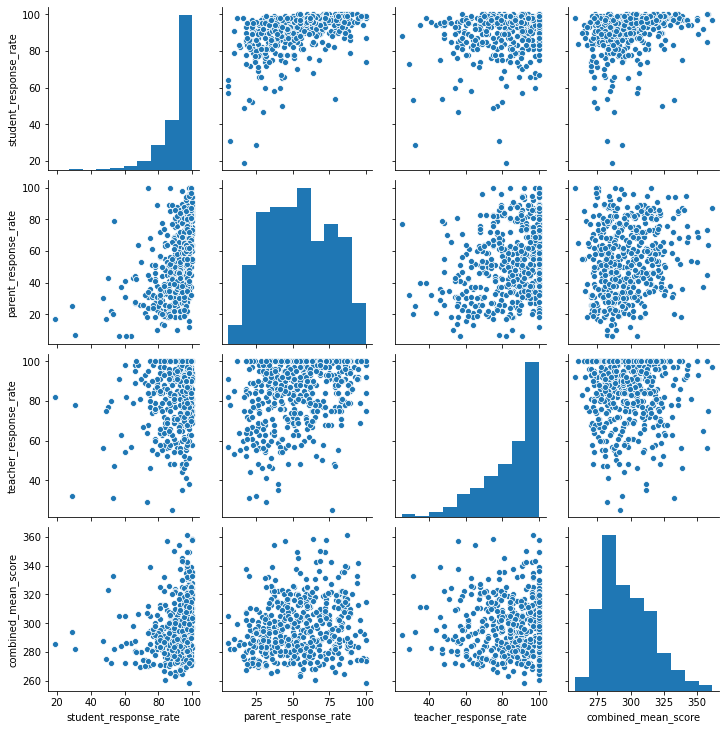

In [5]:
sns.pairplot(sub_15);

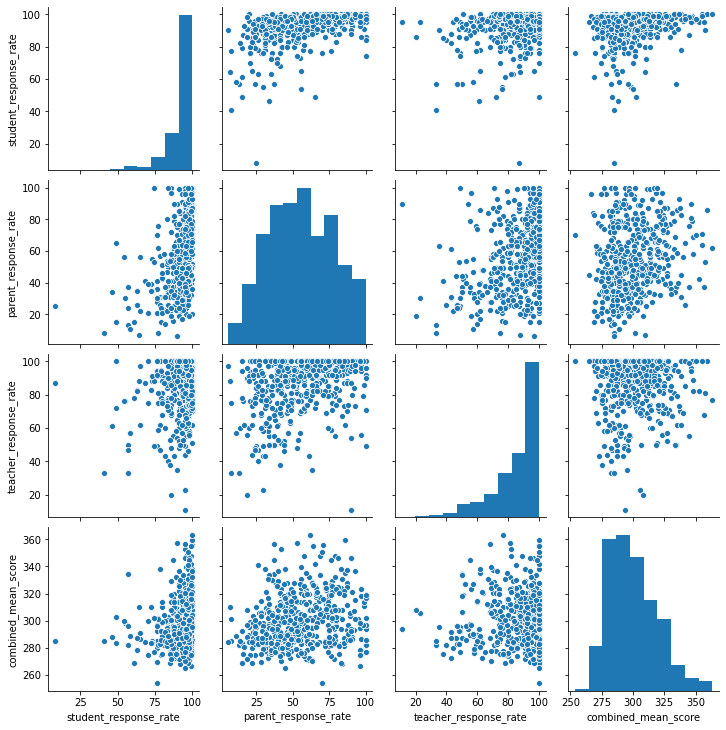

In [6]:
sns.pairplot(sub_16);

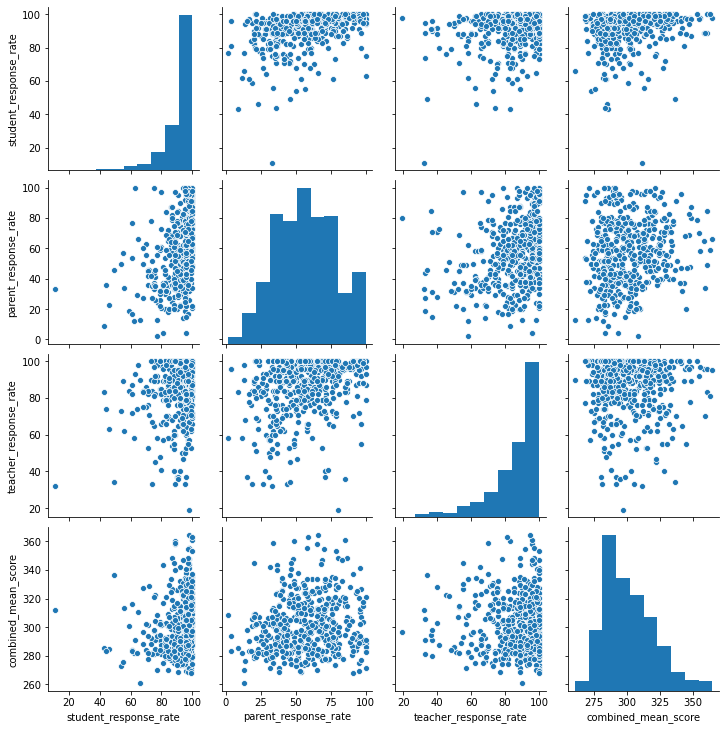

In [7]:
sns.pairplot(sub_17);

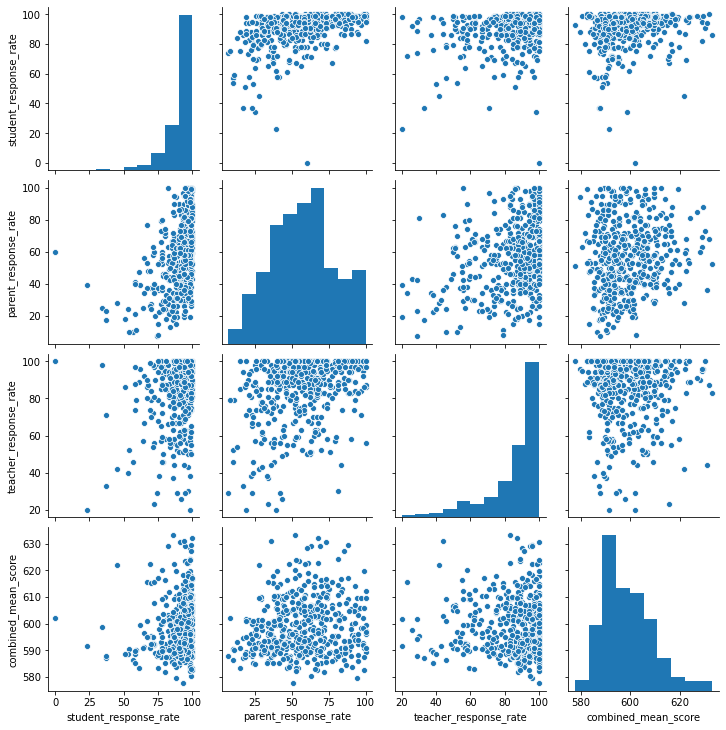

In [8]:
sns.pairplot(sub_18);

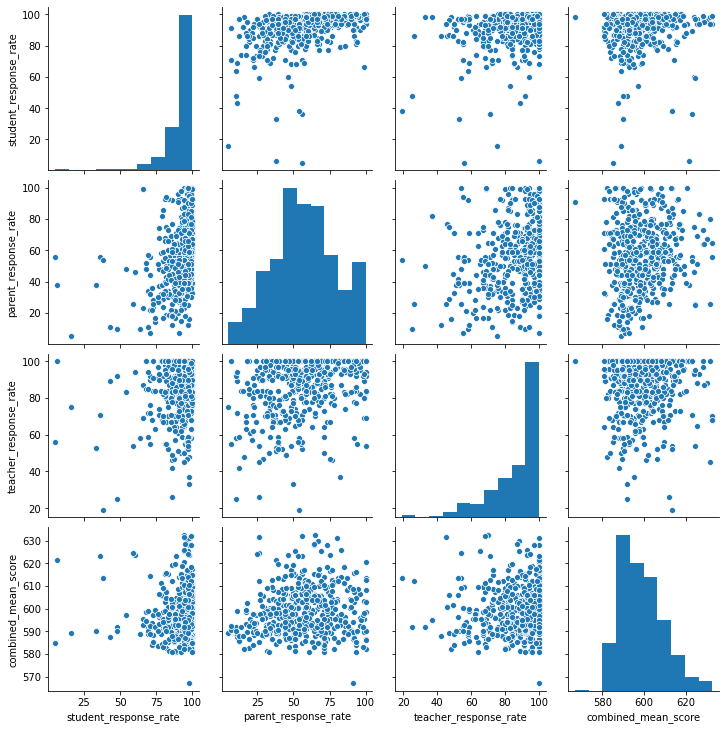

In [9]:
sns.pairplot(sub_19);

The survey response rates across all participant (students, parents, and teachers) appear to be pretty consistent through the years in terms of relations to one another.

In [10]:
# list(set(df_19.columns) - set(['student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']))
unwanted = ['dbn', 'school_name', 'student_response_rate', 'parent_response_rate', 'teacher_response_rate', 'combined_mean_score']
questions = [column for column in df_19.columns if column not in unwanted]


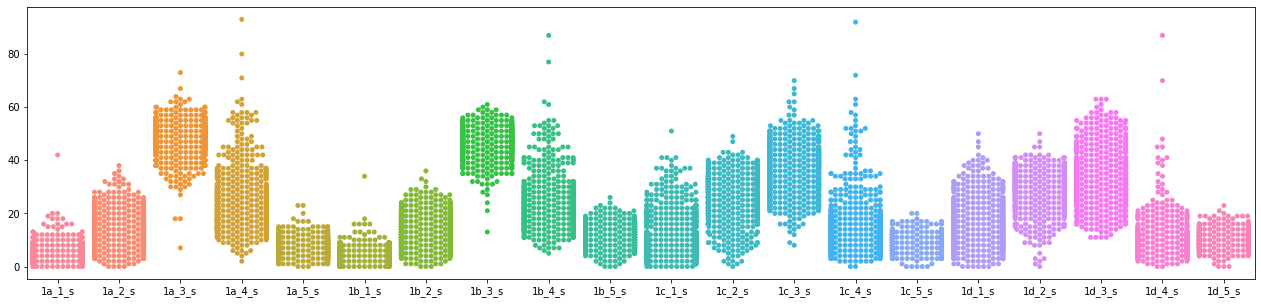

In [11]:
# take a look at the responses from all the questions

questions_only = df_19[questions]
plt.figure(figsize=(22, 5))
sns.swarmplot(data=questions_only.iloc[:, 0:20]);


### Comparing questions between teachers, parents, and students
Certain questions are asked on multiple surveys. Do the opinions of students overlap with that of adults?

In [12]:
# Q. Discipline is applied fairly in my school (students and teachers)
student_dis = [column for column in df_19.columns if column.startswith('4h') and column.endswith('s')]
teacher_dis = [column for column in df_19.columns if column.startswith('7') and column.endswith('t')]

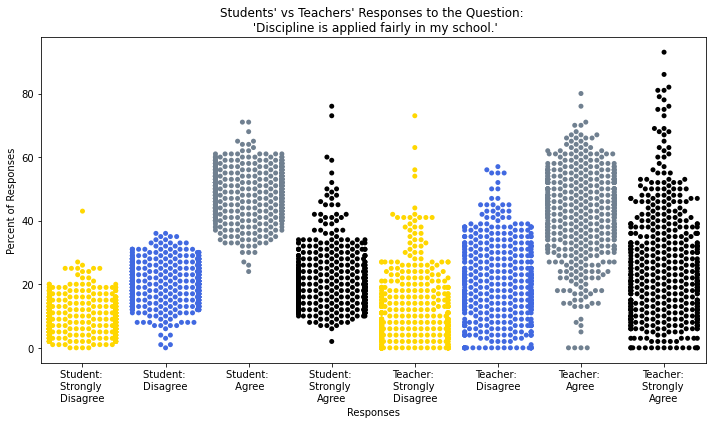

In [13]:
dis_question = df_19[['dbn'] + student_dis + teacher_dis]
plt.figure(figsize=(10, 6))
sns.swarmplot(data = dis_question[student_dis + teacher_dis], palette=['gold', 'royalblue', 'slategrey', 'black', 'gold', 'royalblue', 'slategray', 'black'])
plt.xticks(np.arange(0, 8),
    labels=['Student: \nStrongly \nDisagree', 'Student: \nDisagree', 'Student: \n Agree', 'Student: \nStrongly \nAgree', 
           'Teacher: \nStrongly \nDisagree', 'Teacher: \nDisagree', 'Teacher: \nAgree', 'Teacher: \nStrongly \nAgree'])
plt.title("Students' vs Teachers' Responses to the Question: \n 'Discipline is applied fairly in my school.'")
plt.ylabel('Percent of Responses')
plt.xlabel('Responses')
plt.legend('', frameon=False)
plt.tight_layout();

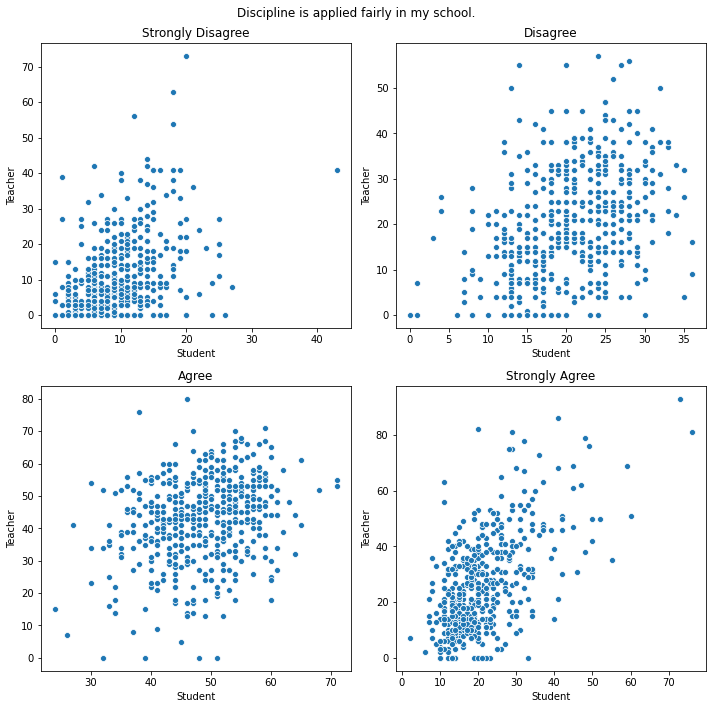

In [14]:
fig = plt.figure(figsize=(10, 10))

ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(x='4h_1_s', y='7_1_t', data=dis_question, ax=ax1)
plt.xlabel('Student')
plt.ylabel('Teacher')
plt.title('Strongly Disagree')
plt.legend('', frameon=False)

ax2 = plt.subplot(2, 2, 2)
sns.scatterplot(x='4h_2_s', y='7_2_t', data=dis_question, ax=ax2)
plt.xlabel('Student')
plt.ylabel('Teacher')
plt.title('Disagree')
plt.legend('', frameon=False)

ax3 = plt.subplot(2, 2, 3)
sns.scatterplot(x='4h_3_s', y='7_3_t', data=dis_question, ax=ax3)
plt.xlabel('Student')
plt.ylabel('Teacher')
plt.title('Agree')
plt.legend('', frameon=False)

ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(x='4h_4_s', y='7_4_t', data=dis_question, ax=ax4)
plt.xlabel('Student')
plt.ylabel('Teacher')
plt.title('Strongly Agree')
plt.legend('', frameon=False)

fig.suptitle('Discipline is applied fairly in my school.')
fig.tight_layout();

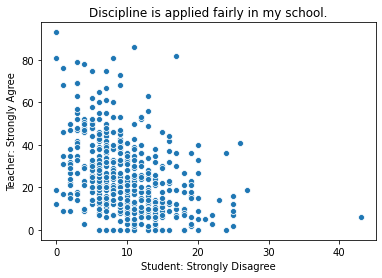

In [15]:
sns.scatterplot(x='4h_1_s', y='7_4_t', data=dis_question)
plt.xlabel('Student: Strongly Disagree')
plt.ylabel('Teacher: Strongly Agree')
plt.title('Discipline is applied fairly in my school.');

In [16]:
dis_question['4h_dis_s'] = dis_question['4h_1_s'] + dis_question['4h_2_s']
dis_question['4h_agr_s'] = dis_question['4h_3_s'] + dis_question['4h_4_s']
dis_question['7_dis_t'] = dis_question['7_1_t'] + dis_question['7_2_t']
dis_question['7_agr_t'] = dis_question['7_3_t'] + dis_question['7_4_t']

/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [17]:
dis_question.drop(columns=dis_question.columns[1:9], inplace=True)

/Users/emikobea/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


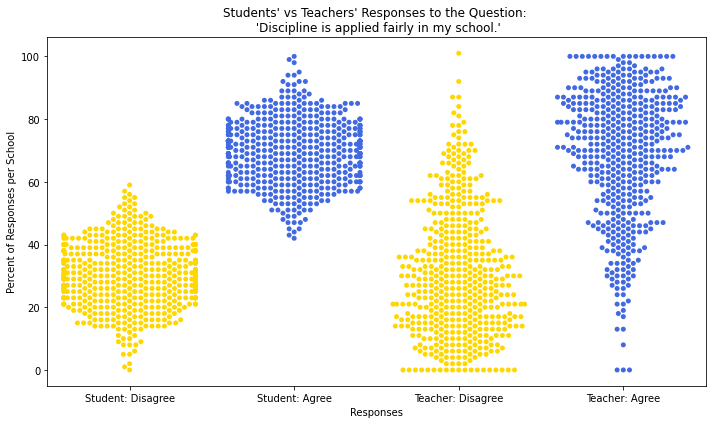

In [18]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data = dis_question, palette=['gold', 'royalblue', 'gold', 'royalblue'])
plt.xticks(np.arange(0, 4),
    labels=['Student: Disagree', 'Student: Agree', 'Teacher: Disagree', 'Teacher: Agree'])
plt.title("Students' vs Teachers' Responses to the Question: \n 'Discipline is applied fairly in my school.'")
plt.ylabel('Percent of Responses per School')
plt.xlabel('Responses')
plt.legend('', frameon=False)
plt.tight_layout();

This is somewhat encouranging that to a certain degree, the students and teachers are observing the same discipline treatments.

In [19]:
dis_question

,dbn,4h_dis_s,4h_agr_s,7_dis_t,7_agr_t
0,01M034,41.0,59.0,68.0,32.0
1,01M140,35.0,65.0,34.0,66.0
2,01M184,28.0,72.0,62.0,38.0
3,01M188,0.0,100.0,4.0,96.0
4,01M332,38.0,62.0,36.0,64.0
...,...,...,...,...,...
477,32K349,30.0,70.0,30.0,71.0
478,32K383,37.0,63.0,55.0,45.0
479,32K384,29.0,71.0,14.0,87.0
480,32K554,9.0,92.0,6.0,94.0


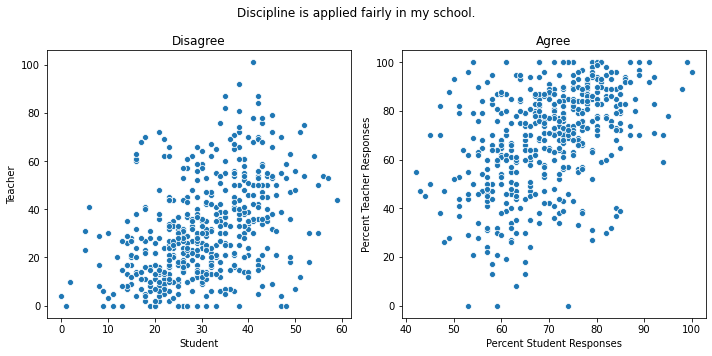

In [29]:
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x='4h_dis_s', y='7_dis_t', data=dis_question, ax=ax1)
plt.xlabel('Student')
plt.ylabel('Teacher')
plt.title('Disagree')
plt.legend('', frameon=False)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x='4h_agr_s', y='7_agr_t', data=dis_question, ax=ax2)
plt.xlabel('Percent Student Responses')
plt.ylabel('Percent Teacher Responses')
plt.title('Agree')
plt.legend('', frameon=False)

fig.suptitle('Discipline is applied fairly in my school.')
fig.tight_layout()

fig.savefig('../assets/discipline_student_teacher.png', bbox_inches='tight');

In [21]:
# Q. At this school, students harass, bully, or intimidate other students. (students and teachers)
student_bull = [column for column in df_19.columns if column.startswith('8a') and column.endswith('s')]
teacher_bull = [column for column in df_19.columns if column.startswith('8') and column.endswith('t')]

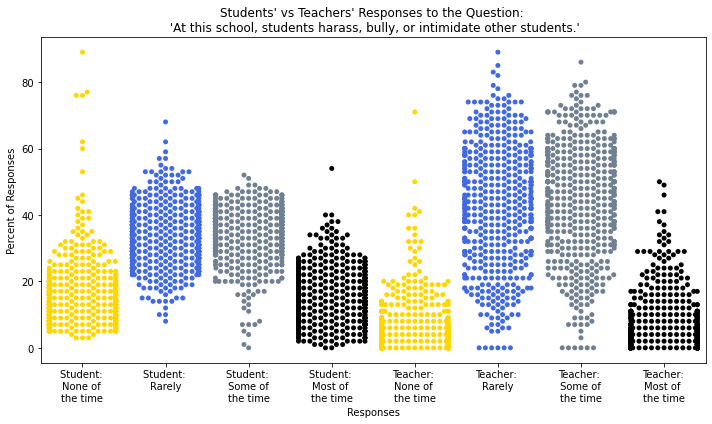

In [22]:
bull_question = df_19[['dbn'] + student_bull + teacher_bull]
plt.figure(figsize=(10, 6))
sns.swarmplot(data = bull_question[student_bull + teacher_bull], palette=['gold', 'royalblue', 'slategrey', 'black', 'gold', 'royalblue', 'slategray', 'black'])
plt.xticks(np.arange(0, 8),
    labels=['Student: \nNone of \nthe time', 'Student: \nRarely', 'Student: \n Some of \nthe time', 'Student: \nMost of \nthe time', 
           'Teacher: \nNone of \nthe time', 'Teacher: \nRarely', 'Teacher: \n Some of \nthe time', 'Teacher: \nMost of \nthe time'])
plt.title("Students' vs Teachers' Responses to the Question: \n 'At this school, students harass, bully, or intimidate other students.'")
plt.ylabel('Percent of Responses')
plt.xlabel('Responses')
plt.legend('', frameon=False)
plt.tight_layout();

In [23]:
bull_question['student_no'] = bull_question['8a_1_s'] + bull_question['8a_2_s']
bull_question['student_yes'] = bull_question['8a_3_s'] + bull_question['8a_4_s']
bull_question['teacher_no'] = bull_question['8_1_t'] + bull_question['8_2_t']
bull_question['teacher_yes'] = bull_question['8_3_t'] + bull_question['8_4_t']

/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [24]:
bull_question.drop(columns=bull_question.columns[1:9], inplace=True)

/Users/emikobea/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


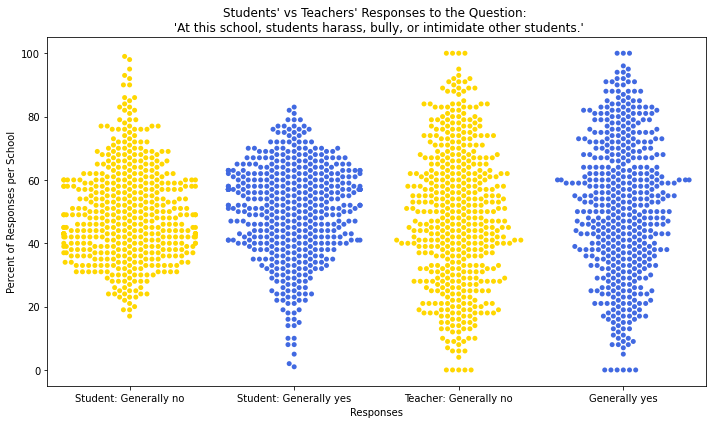

In [25]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data = bull_question, palette=['gold', 'royalblue', 'gold', 'royalblue'])
plt.xticks(np.arange(0, 4),
    labels=['Student: Generally no', 'Student: Generally yes', 'Teacher: Generally no', 'Generally yes'])
plt.title("Students' vs Teachers' Responses to the Question: \n 'At this school, students harass, bully, or intimidate other students.'")
plt.ylabel('Percent of Responses per School')
plt.xlabel('Responses')
plt.legend('', frameon=False)
plt.tight_layout();

In [26]:
bull_question.head(2)

,dbn,student_no,student_yes,teacher_no,teacher_yes
0,01M034,31.0,70.0,24.0,76.0
1,01M140,42.0,58.0,41.0,59.0


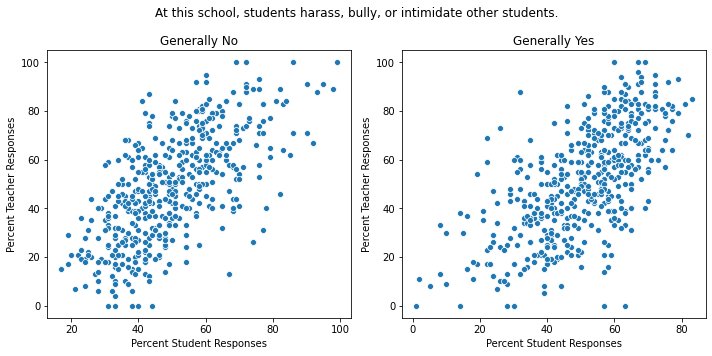

In [33]:
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x='student_no', y='teacher_no', data=bull_question, ax=ax1)
plt.xlabel('Percent Student Responses')
plt.ylabel('Percent Teacher Responses')
plt.title('Generally No')
plt.legend('', frameon=False)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x='student_yes', y='teacher_yes', data=bull_question, ax=ax2)
plt.xlabel('Percent Student Responses')
plt.ylabel('Percent Teacher Responses')
plt.title('Generally Yes')
plt.legend('', frameon=False)

fig.suptitle('At this school, students harass, bully, or intimidate other students.')
fig.tight_layout()

fig.savefig('../assets/discipline_student_teacher.png', bbox_inches='tight');

In [30]:
# Q. At this school, students with diasabilities are included in all school activities (students and teachers)
student_fair = [column for column in df_19.columns if column.startswith('1e') and column.endswith('s')]
teacher_fair = [column for column in df_19.columns if column.startswith('6c') and column.endswith('t')]
fair_question = df_19[['dbn'] + student_fair + teacher_fair]

fair_question['student_no'] = fair_question['1e_1_s'] + fair_question['1e_2_s']
fair_question['student_yes'] = fair_question['1e_3_s'] + fair_question['1e_4_s']
fair_question['teacher_no'] = fair_question['6c_1_t'] + fair_question['6c_2_t']
fair_question['teacher_yes'] = fair_question['6c_3_t'] + fair_question['6c_4_t']

/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/emikobea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

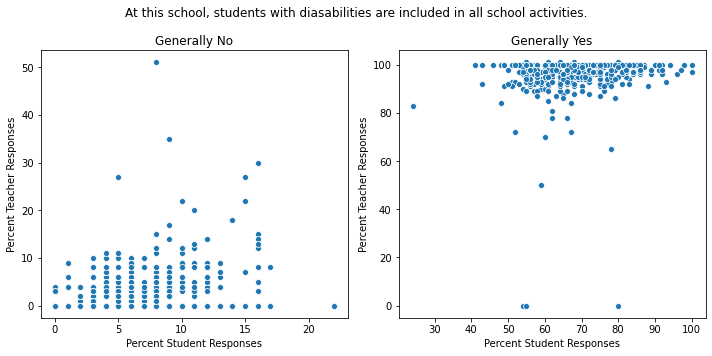

In [32]:
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x='student_no', y='teacher_no', data=fair_question, ax=ax1)
plt.xlabel('Percent Student Responses')
plt.ylabel('Percent Teacher Responses')
plt.title('Generally No')
plt.legend('', frameon=False)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x='student_yes', y='teacher_yes', data=fair_question, ax=ax2)
plt.xlabel('Percent Student Responses')
plt.ylabel('Percent Teacher Responses')
plt.title('Generally Yes')
plt.legend('', frameon=False)

fig.suptitle('At this school, students with diasabilities are included in all school activities.')
fig.tight_layout()

fig.savefig('../assets/disability_inclusion_student_teacher.png', bbox_inches='tight');